In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
consistency = pd.read_csv('consistency.csv')
print(consistency.values.shape)

(43, 7)


In [9]:
E1 = np.squeeze(consistency.values[np.argwhere(consistency.values[:, 0]=='E1')])
E2 =  np.squeeze(consistency.values[np.argwhere(consistency.values[:, 0]=='E2')])
E3 = consistency.values[np.argwhere(consistency.values[:, 0]=='E3')]
E4 = consistency.values[np.argwhere(consistency.values[:, 0]=='E4')]

gc_509 = np.delete(np.vstack((E1[0], E2[0], E3[0], E4[0])),0,1).astype(np.float32)
gc_493 = np.delete(np.vstack((E1[1], E2[1], E3[1], E4[1])),0,1).astype(np.float32)
gc_489 = np.delete(np.vstack((E1[2], E2[2], E3[2], E4[2])),0,1).astype(np.float32)
gc_487 = np.delete(np.vstack((E1[4], E2[4], E3[4], E4[4])),0,1).astype(np.float32) # inclusive, so skipped 487

np.save('gc_scores_organized/gc_509', gc_509)
np.save('gc_scores_organized/gc_493', gc_493)
np.save('gc_scores_organized/gc_489', gc_489)
np.save('gc_scores_organized/gc_487', gc_487)

In [10]:
mean_full= np.zeros((5,6))
std_full = np.zeros((5,6))
total_gc = np.zeros((4,6,4)) # patients x pairwise detector combos x epochs 
i = 0
j = 0
for row in consistency.values:
    if row[0]=='Mean ':
        mean_full[i] = np.asarray(row[1:], dtype=np.float64)
        i += 1
    if row[0]=='Std Dev ' or row[0] == 'Std Dev':
        std_full[j] = np.asarray(row[1:], dtype=np.float64)
        j += 1
        
        

In [11]:
# remove patient 487, non inclusive, as this data is not used in the paper
mean = np.delete(mean_full, 3, axis=0)
std = np.delete(std_full, 3, axis=0)
print(mean.shape)
print(std.shape)

(4, 6)
(4, 6)


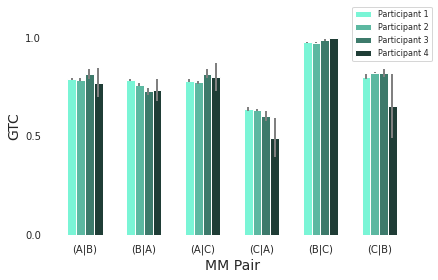

In [12]:
fig, ax = plt.subplots()
sns.despine()
sns.set_theme()
sns.set_style('white')
sns.despine(bottom=True, left=True)
fig.set_size_inches(6.5, 4)
green = np.asarray([.4, .8, .7])
f = [1.2, .9, .6, .3]
ax.bar(np.arange(0,6,1), mean[0, :], yerr=std[0,:], width=.15, label='Participant 1', color=f[0]*green, 
      error_kw=dict(ecolor='gray', lw=2, capsize=0, capthick=1))
ax.bar(np.arange(0,6,1)+.15, mean[1, :], yerr=std[1,:],  width=.15, label='Participant 2', 
       error_kw=dict(ecolor='gray', lw=2, capsize=0, capthick=1), color=f[1]*green)
ax.bar(np.arange(0,6,1)+.3, mean[2, :], yerr=std[2,:],  width=.15, label='Participant 3', 
       error_kw=dict(ecolor='gray', lw=2, capsize=0, capthick=1), color=f[2]*green)
ax.bar(np.arange(0,6,1)+.45, mean[3, :], yerr=std[3,:], width=.15, label='Participant 4', 
       error_kw=dict(ecolor='gray', lw=2, capsize=0, capthick=1, align='center'), color=f[3]*green)
ax.set_xticks(np.arange(0,6,1)+.225)
ax.set_xticklabels(['(A|B)', '(B|A)', '(A|C)', '(C|A)', '(B|C)', '(C|B)'])
ax.set_yticks(np.arange(0,1.01,.5))
ax.set_ylim(0,1.1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.set_ylabel("GTC", fontsize=14)
ax.set_xlabel("MM Pair", fontsize=14)
#ax.set_title("Consistency across marking methodologies", fontsize=15)
plt.legend(bbox_to_anchor=(.82,.78), fontsize=8)
plt.savefig('/home3/ebrahim/TNEC_paper_code/figures/ground_truth_consistency.pdf', dpi=400, bbox_inches='tight', format='pdf')
#plt.savefig('Consistency_Figures_png/ground_truth_consistency', dpi=400, bbox_inches='tight')


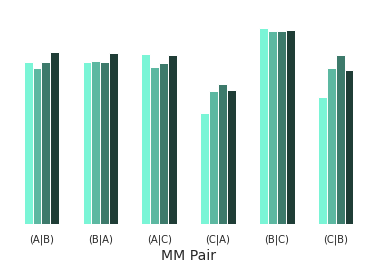

In [13]:
p_arr = ['509', '493', '489', '487']
gtc_arr_global = np.zeros((4,6))
for i, p in enumerate(p_arr):
    gtc_arr_global[i] = np.load('ground_truth_global/' + p + '.npy')

fig, ax = plt.subplots()
sns.despine()
sns.set_theme()
sns.set_style('white')
sns.despine(bottom=True, left=True)
fig.set_size_inches(6.5, 4)
green = np.asarray([.4, .8, .7])
f = [1.2, .9, .6, .3]
ax.bar(np.arange(0,6,1), gtc_arr_global[0, :], width=.15, color=f[0]*green, 
      error_kw=dict(ecolor='gray', lw=2, capsize=0, capthick=1))
ax.bar(np.arange(0,6,1)+.15, gtc_arr_global[1, :],  width=.15,
       error_kw=dict(ecolor='gray', lw=2, capsize=0, capthick=1), color=f[1]*green)
ax.bar(np.arange(0,6,1)+.3, gtc_arr_global[2, :],  width=.15,
       error_kw=dict(ecolor='gray', lw=2, capsize=0, capthick=1), color=f[2]*green)
ax.bar(np.arange(0,6,1)+.45, gtc_arr_global[3, :], width=.15, 
       error_kw=dict(ecolor='gray', lw=2, capsize=0, capthick=1, align='center'), color=f[3]*green)
ax.set_xticks(np.arange(0,6,1)+.225)
ax.set_xticklabels(['(A|B)', '(B|A)', '(A|C)', '(C|A)', '(B|C)', '(C|B)'])
ax.set_yticks([])
ax.set_ylim(0,1.1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.set_xlabel("MM Pair", fontsize=14)
plt.savefig('/home3/ebrahim/TNEC_paper_code/figures/ground_truth_consistency_global.pdf', dpi=400, bbox_inches='tight', format='pdf')
#plt.savefig('Consistency_Figures_png/ground_truth_consistency', dpi=400, bbox_inches='tight')
